In [8]:
import numpy as np 
from PIL import Image
from openpose import pyopenpose as op
import time
import argparse
import pickle
import cv2
from tqdm.notebook import tqdm
import os
from scipy.sparse import coo_matrix

In [2]:
# Flags
#parser = argparse.ArgumentParser()
#parser.add_argument("--image_dir", default="/home/yolo/network-model/organized/0", help="Process a directory of images. Read all standard formats (jpg, png, bmp, etc.).")
#parser.add_argument("--no_display", default=False, help="Enable to disable the visual display.")
#args = parser.parse_known_args()

In [3]:
param = {
            #  指向 OpenPose 的模型文件夹的路径
            'model_folder': '/home/yolo/openpose/models/', 
            'face': True, 
            # CNN脸部检测器
            'face_detector': 2, 
            # 不开启身体姿势估计
            'body': 0
        }

# 创建一个 OpenPose Python 接口的实例
wrapper = op.WrapperPython() 
# 使用前面定义的参数配置 OpenPose 实例
wrapper.configure(param)
# 启动 OpenPose，包括加载模型、初始化硬件资源等
wrapper.start() 
# 创建一个 OpenPose 的 Rectangle 对象，可能用于定义脸部检测的区域。
# 这里定义了一个左上角在 (0, 0)，宽度和高度都为 100 的矩形，图片长度是100 X 100
face = [op.Rectangle(0.000000, 0.000000, 100.000000, 100.000000)]

Starting OpenPose Python Wrapper...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.


In [4]:
# Read frames on directory
#imagePaths = op.get_images_on_directory(args[0].image_dir);
data = {}

In [5]:
start_time = time.time()
root_dir = '/home/yolo/network-model/organized/'  # 文件夹的路径，你需要将其替换为实际的路径

for dir_name in os.listdir(root_dir):
    dir_path  = os.path.join(root_dir, dir_name)
    print(dir_path)
    if not os.path.isdir(dir_path):
        continue
    for filename in tqdm(os.listdir(dir_path)):
        image_path = os.path.join(dir_path, filename)
        #print(image_path)
        datum = op.Datum()
        imageToProcess = cv2.imread(image_path)
        datum.cvInputData = imageToProcess
        # 需要进行面部检测的区域
        datum.faceRectangles = face 
        # 将 Datum 对象放入到一个 VectorDatum 中，并调用 self.wrapper 的 emplaceAndPop 方法进行处理
        wrapper.emplaceAndPop(op.VectorDatum([datum]))
        # 创建指定类型为 float32 的空数组
        #keypoint_channel = np.zeros((100, 100),dtype=np.float32)
        keypoint_channel = np.full((100, 100), -1, dtype=np.float32)
        # 提取路径中的部分
        image_name = image_path.split('/organized/')[1]
        for y, x in datum.faceKeypoints[0,:,:2]: 
            x, y = int(x), int(y)
            keypoint_channel[x-2:x+2,y-2:y+2] = 1
            #keypoint_channel[x,y] = 1
        #sparse_matrix = coo_matrix(keypoint_channel)
        #data[image_name] = sparse_matrix
        data[image_name] = keypoint_channel

# 关闭实例
del datum
# 关闭实例
wrapper.stop()
end_time = time.time()

# 计算运行时间
execution_time = end_time - start_time

# 输出运行时间
print(f"程序运行时间为：{execution_time} 秒")

/home/yolo/network-model/organized/4


  0%|          | 0/2460 [00:00<?, ?it/s]

/home/yolo/network-model/organized/6


  0%|          | 0/3204 [00:00<?, ?it/s]

/home/yolo/network-model/organized/1


  0%|          | 0/355 [00:00<?, ?it/s]

/home/yolo/network-model/organized/2


  0%|          | 0/877 [00:00<?, ?it/s]

/home/yolo/network-model/organized/5


  0%|          | 0/867 [00:00<?, ?it/s]

/home/yolo/network-model/organized/0


  0%|          | 0/1619 [00:00<?, ?it/s]

/home/yolo/network-model/organized/3


  0%|          | 0/5957 [00:00<?, ?it/s]

程序运行时间为：2347.6206452846527 秒


In [6]:
# 保存字典和数组到文件
with open('dataonenormal.pkl', 'wb') as f:
    pickle.dump((data), f)

In [28]:
# 加载保存的数据
with open('data.pkl', 'rb') as f:
     loaded_data = pickle.load(f)


In [9]:
# 加载保存的数据
with open('datarow.pkl', 'rb') as f:
     loaded_data = pickle.load(f)

In [7]:
# 加载保存的数据
with open('dataonenormal.pkl', 'rb') as f:
     loaded_data = pickle.load(f)

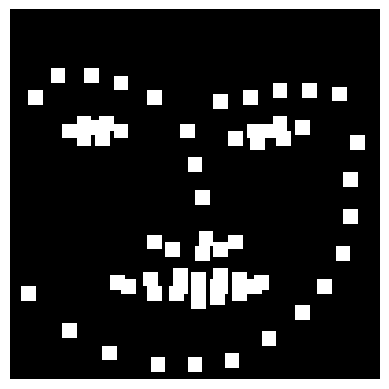

In [17]:
import numpy as np
import matplotlib.pyplot as plt


# 绘制图像
plt.imshow(arr, cmap='gray')
plt.axis('off')
plt.show()
